## Insurance Amount Prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the insurance amoount depends on the defferent features and like age, region, bmi, and sex.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mirichoi0218/insurance
- The data consists of 7 column and 1338 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('/home/muhammed-shafeeh/AI_ML/ML_Medical_insurance_cost_prediction/data/kaggle_data/insurance.csv')

#### Show Top 5 Records

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of the dataset

In [5]:
df.shape

(1338, 7)

### 2.2 Dataset information

- sex : sex of students  -> (Male/female)
- age : age of the each person 
- bmi : bmi of the each person 
- children : how many children for each person 
- smoker : the status of each person who smoke or not -> Yes or No
- region : the region of each person
- Amount


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

1

### 3.2.1 Remove duplicate

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### There is one duplicate value and removed

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Insight


Age:

Mean: 39.2 years; Range: 18–64 years.
50% fall between 27–51 years.
BMI:

Mean: 30.7 (obese); Range: 15.96–53.13.
50% fall between 26.29–34.7 (overweight to obese).
Children:

Mean: 1.1; Range: 0–5.
50% have 0–2 children.
Charges:

Mean: $13,279; Range: $1,121–$63,770.
50% pay between $4,746–$16,658.

Distribution is right-skewed due to high outliers.

This dataset reflects variability in age, BMI, and charges, with significant influence from obesity and family size on costs.

### 3.7 Exploring Data

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())


Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [15]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

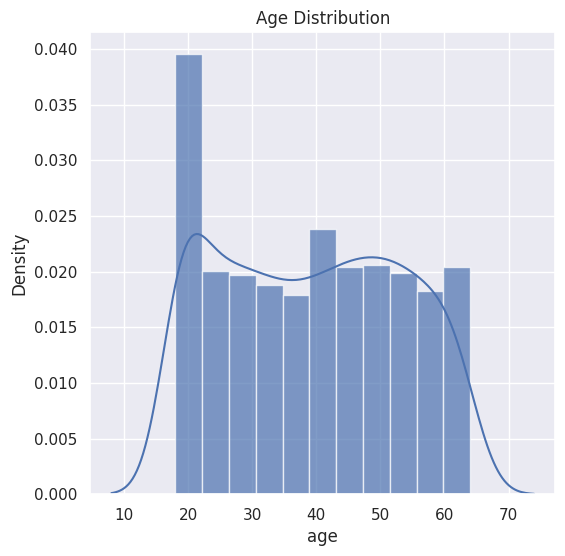

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'], hist_kws={'alpha': .7})
plt.title('Age Distribution')
plt.show()

### Insight 

- The majority of the population in the dataset is in the 40-50 year old range.

- There is a wide range of ages in the dataset, from 20 to 80 years old.

- The density of ages is highest in the 40-50 year old range.

- There are some people in the dataset who are quite old.

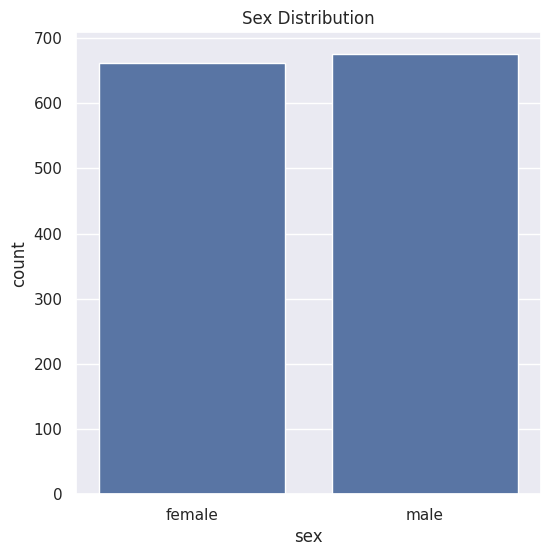

In [17]:
# countplot for age
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [18]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

### Insight

- The dataset is predominantly male, with a male-to-female ratio of approximately 1.5:1.

- There are no other sex categories in the dataset.

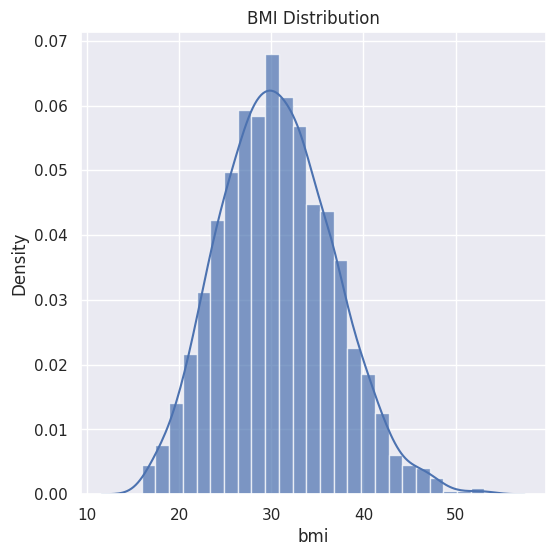

In [19]:
# distribution of bmi value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'], hist_kws={'alpha': .7})
plt.title('BMI Distribution')
plt.show()

#####  Insights
- The majority of the population in the dataset is in the 25-30 BMI range.

- There is a wide range of BMI values in the dataset, from 15 to 50.

- The density of BMI values is highest around the peak BMI of 25-30.

- There are some people in the dataset who are quite underweight.

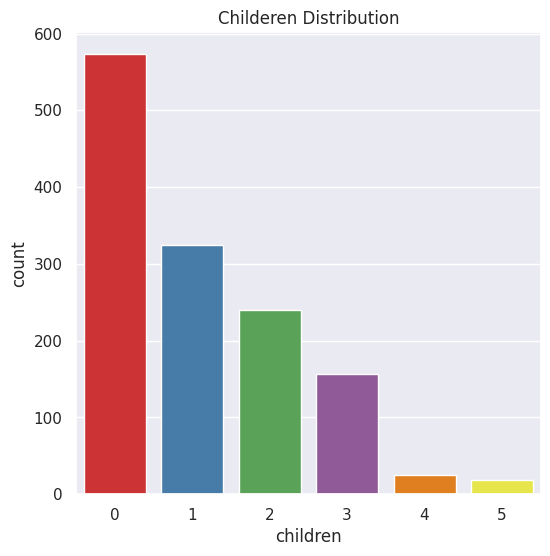

In [20]:
# countplot for age
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df,palette='Set1')
plt.title('Childeren Distribution')
plt.show()

In [21]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Insight

- The majority of individuals in the dataset have no children.

- There are more individuals with 1 child than individuals with 2 or more children.

- The proportion of individuals with no children is approximately 55%.

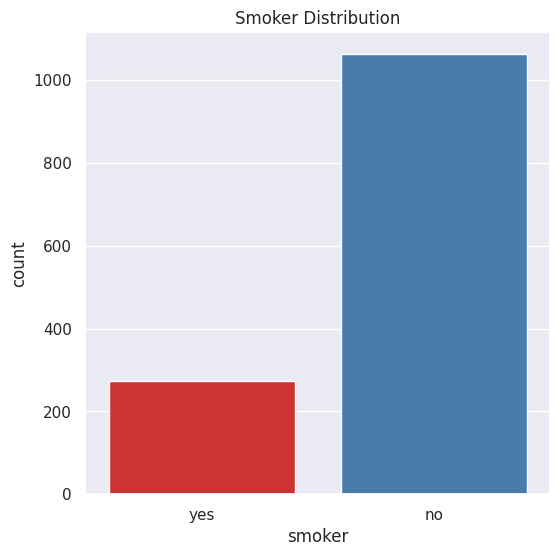

In [22]:
# countplot for age
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df,palette='Set1')
plt.title('Smoker Distribution')
plt.show()

In [23]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

#####  Insights
- The majority of individuals in the dataset are non-smokers.

- There is a significant proportion of smokers in the dataset, approximately 30%.

- The proportion of smokers is lower than the proportion of non-smokers.

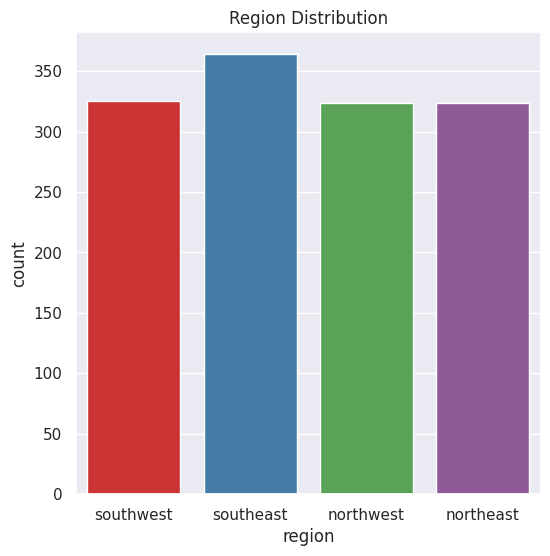

In [24]:
# countplot for age
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df,palette='Set1')
plt.title('Region Distribution')
plt.show()

In [25]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

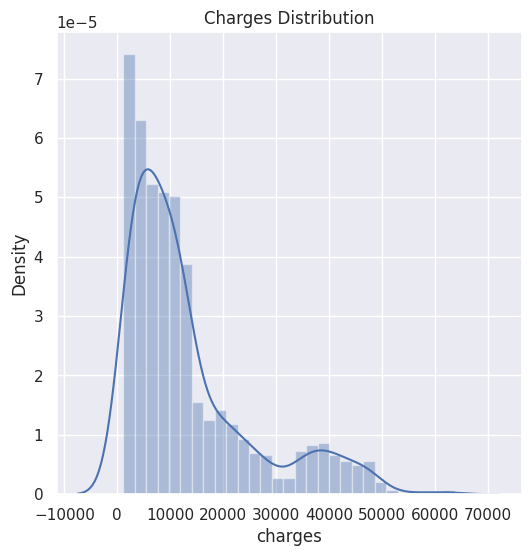

In [26]:
# distribution of bmi value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

#### 4.4.2 SEX COLUMN
- How is Group wise distribution ?
- Is Sex has any impact on charges ?

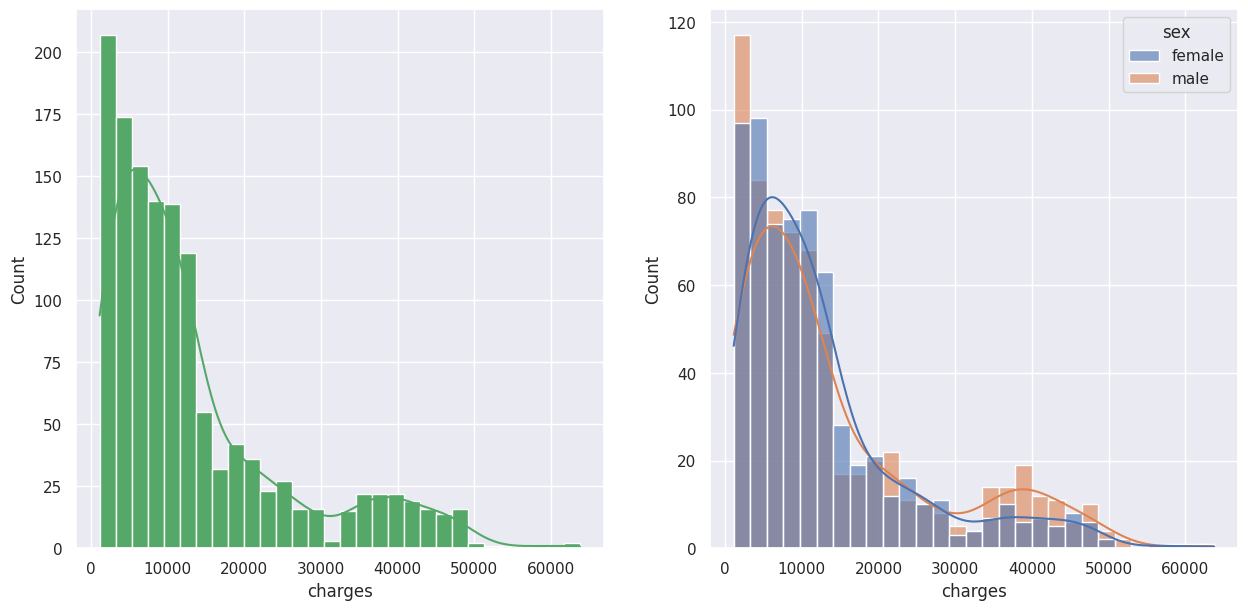

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='charges', bins=30, kde=True, color='g', alpha=1)
plt.subplot(122)
sns.histplot(data=df, x='charges', kde=True, hue='sex', alpha=0.6)
plt.show()

### Male and Female Smoker's charge distribution

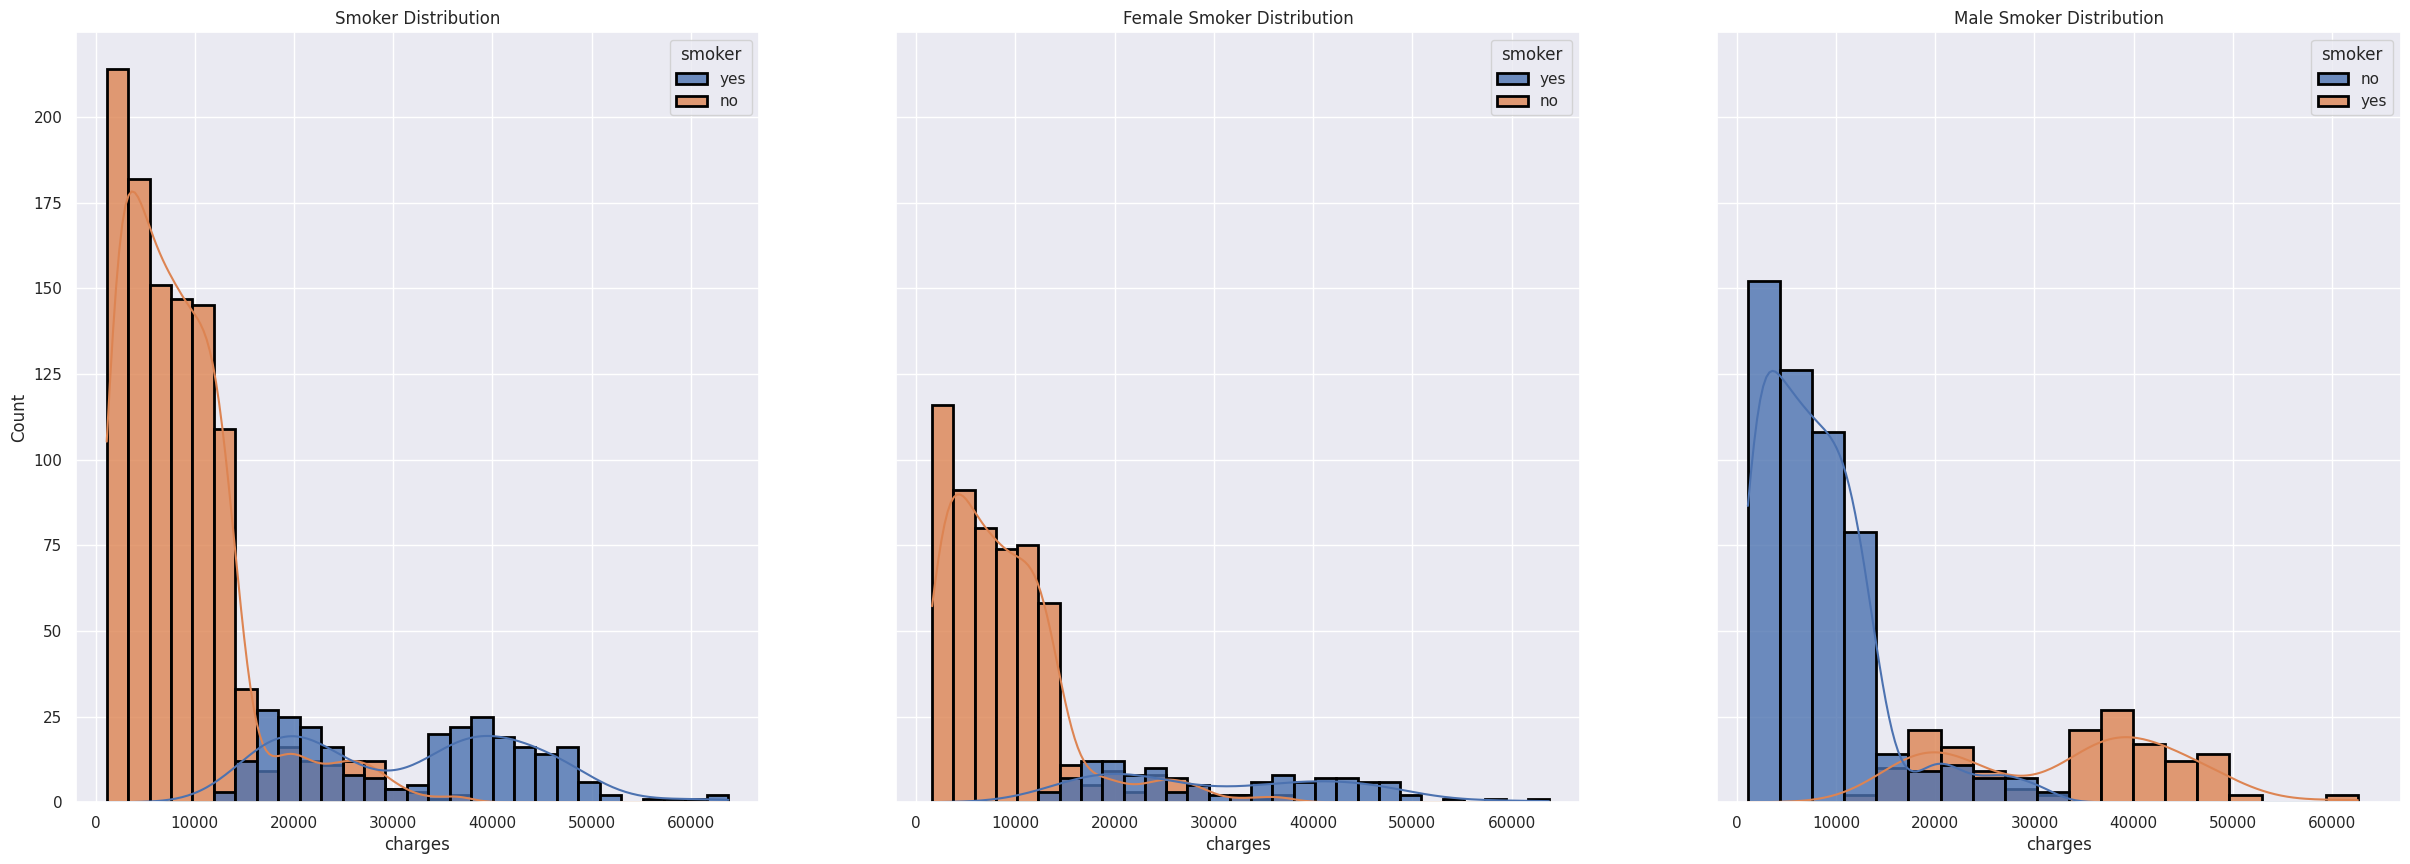

In [28]:

fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=True, sharey=True)
sns.histplot(data=df, x='charges', kde=True, hue='smoker', alpha=0.8, ax=axs[0], edgecolor='black', linewidth=2)
axs[0].set_title('Smoker Distribution')
sns.histplot(data=df[df.sex == 'female'], x='charges', kde=True, hue='smoker', alpha=0.8, ax=axs[1],edgecolor='black', linewidth=2)
axs[1].set_title('Female Smoker Distribution')
sns.histplot(data=df[df.sex == 'male'], x='charges', kde=True, hue='smoker', alpha=0.8, ax=axs[2],edgecolor='black', linewidth=2)
axs[2].set_title('Male Smoker Distribution')
plt.show()

### Insight

- Smokers tend to have higher charges than non-smokers

- Male smokers tend to have higher charges than female smokers

- There is some variation within each group that is not explained by the smoker status or sex

In [29]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 4.4.3 REGION COLUMN
- How is Group wise distribution ?
- Is Region has any impact on charges ?

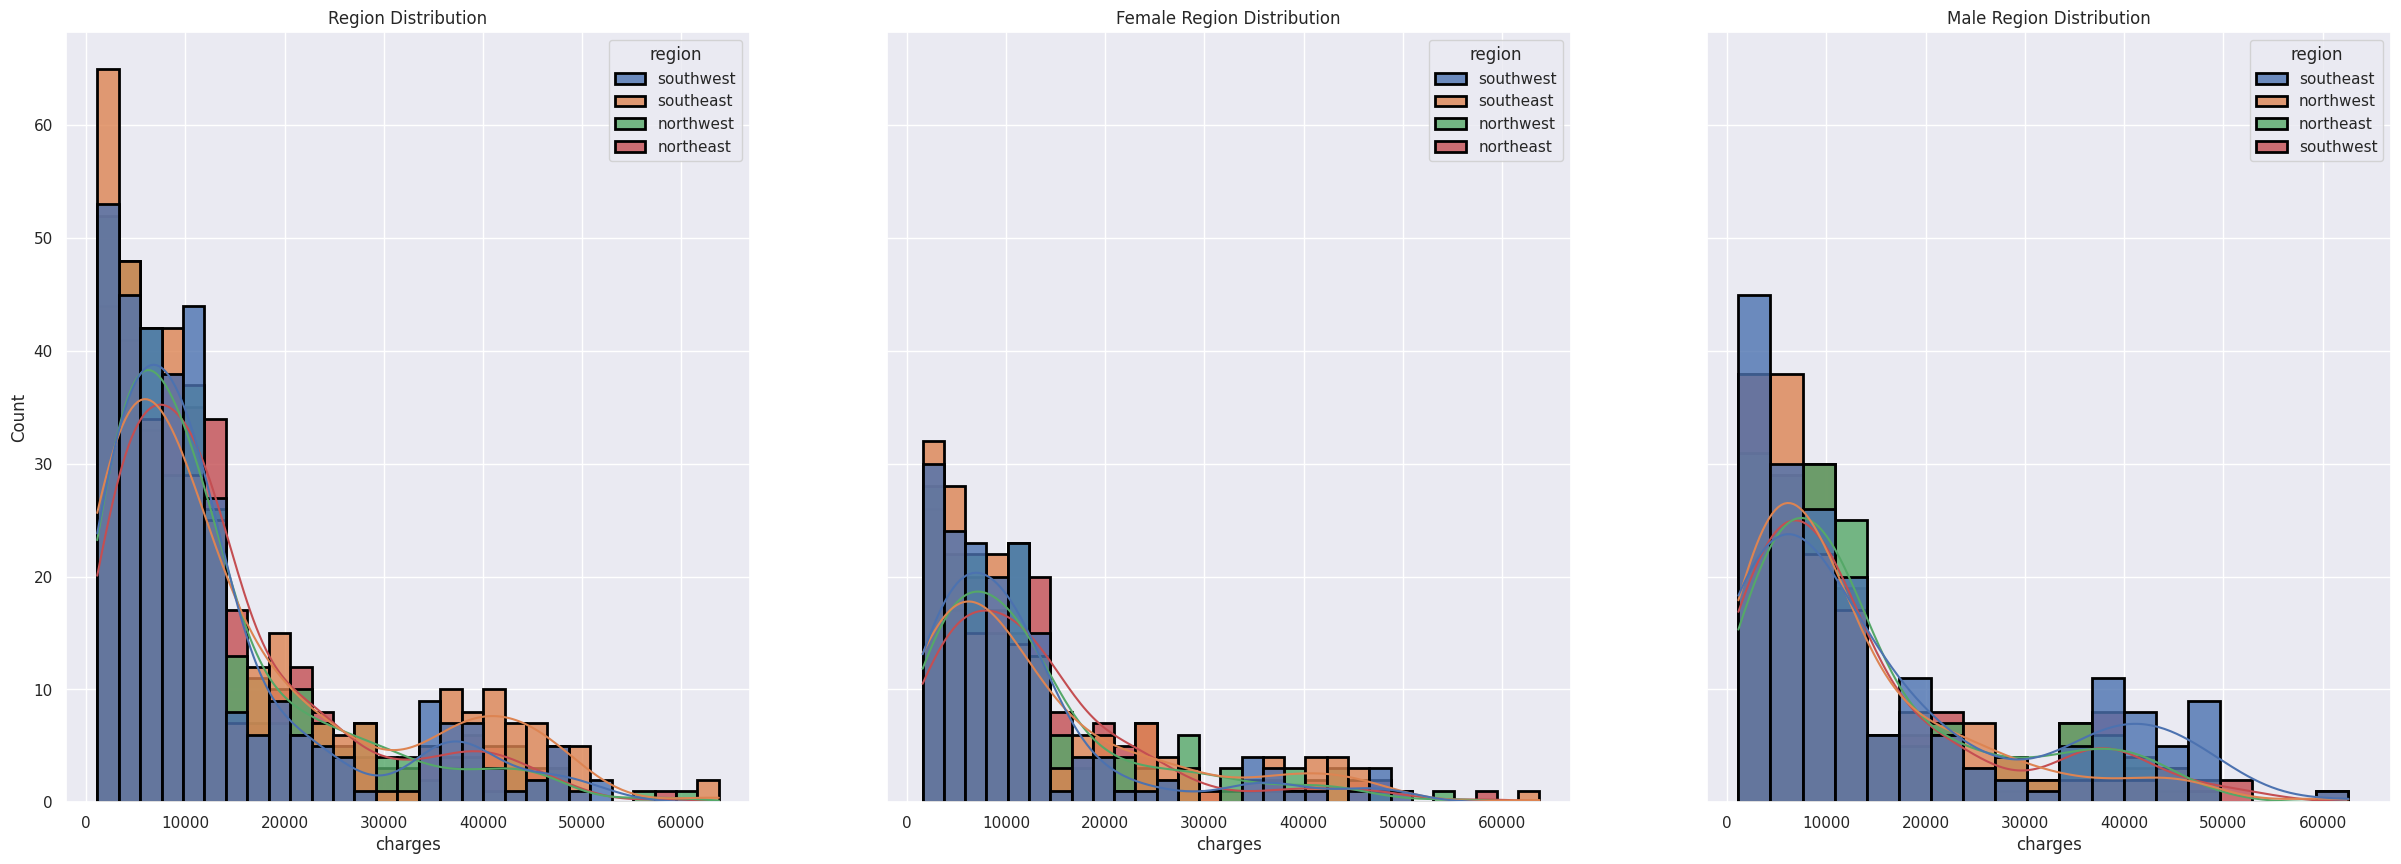

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=True, sharey=True)
sns.histplot(data=df, x='charges', kde=True, hue='region', alpha=0.8, edgecolor='black', linewidth=2, ax=axs[0])
axs[0].set_title('Region Distribution')
sns.histplot(data=df[df.sex == 'female'], x='charges', kde=True, hue='region', alpha=0.8, edgecolor='black', linewidth=2, ax=axs[1])
axs[1].set_title('Female Region Distribution')
sns.histplot(data=df[df.sex == 'male'], x='charges', kde=True, hue='region', alpha=0.8, edgecolor='black', linewidth=2, ax=axs[2])
axs[2].set_title('Male Region Distribution')
plt.show()

### Insight

- The Northeast region has the highest charges, while the Southeast region has the lowest charges.

- The distribution of charges across regions is similar for both females and males.

- The charges are highest in the Northeast region and lowest in the Southeast region, regardless of sex.

#### 4.3 Multivariate analysis using pieplot

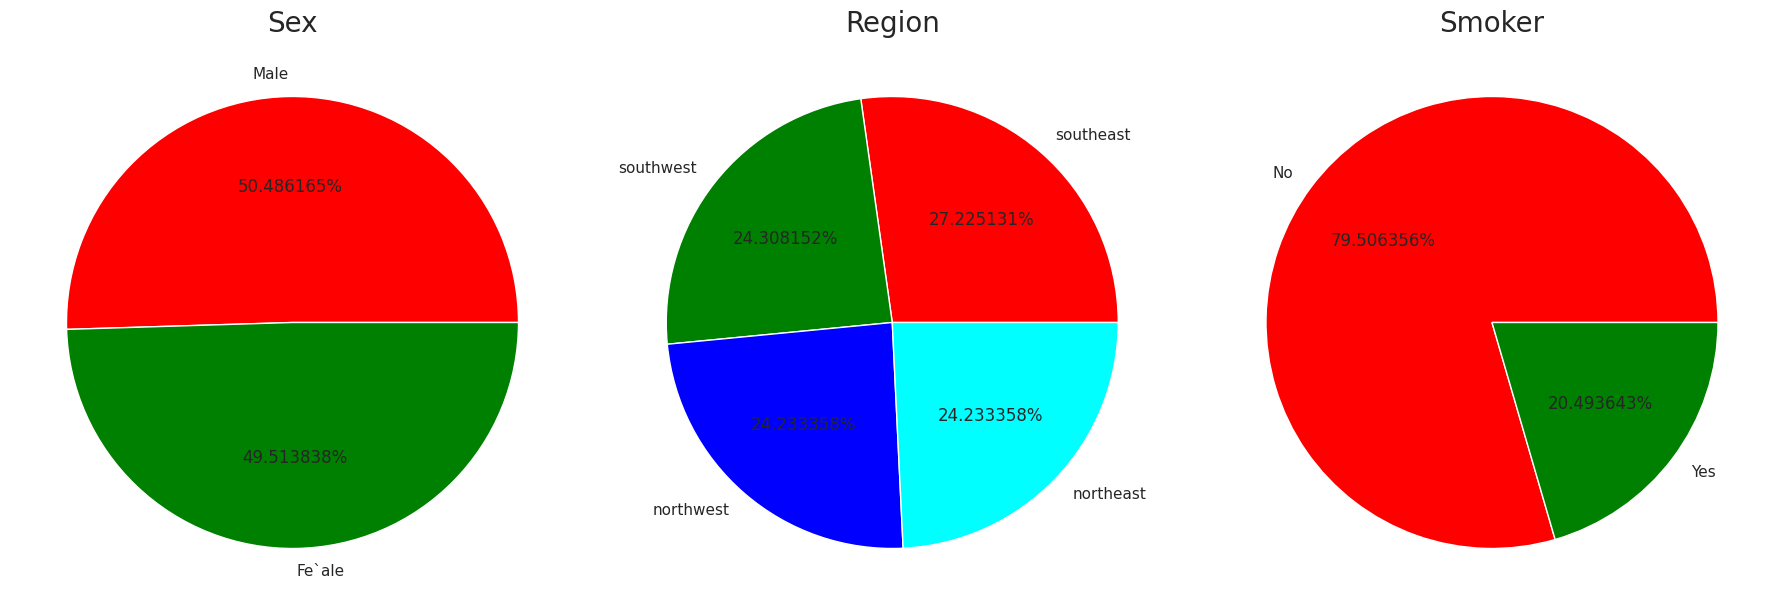

In [31]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Male', 'Fe`ale'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Region', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['smoker'].value_counts()
labels = 'No', 'Yes'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Smoker', fontsize = 20)
plt.axis('off')





plt.tight_layout()
plt.grid()

plt.show()

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN (Univariate Analysis)
- How is distribution of Gender ?
- Is gender has any impact on Isurance Amount ?

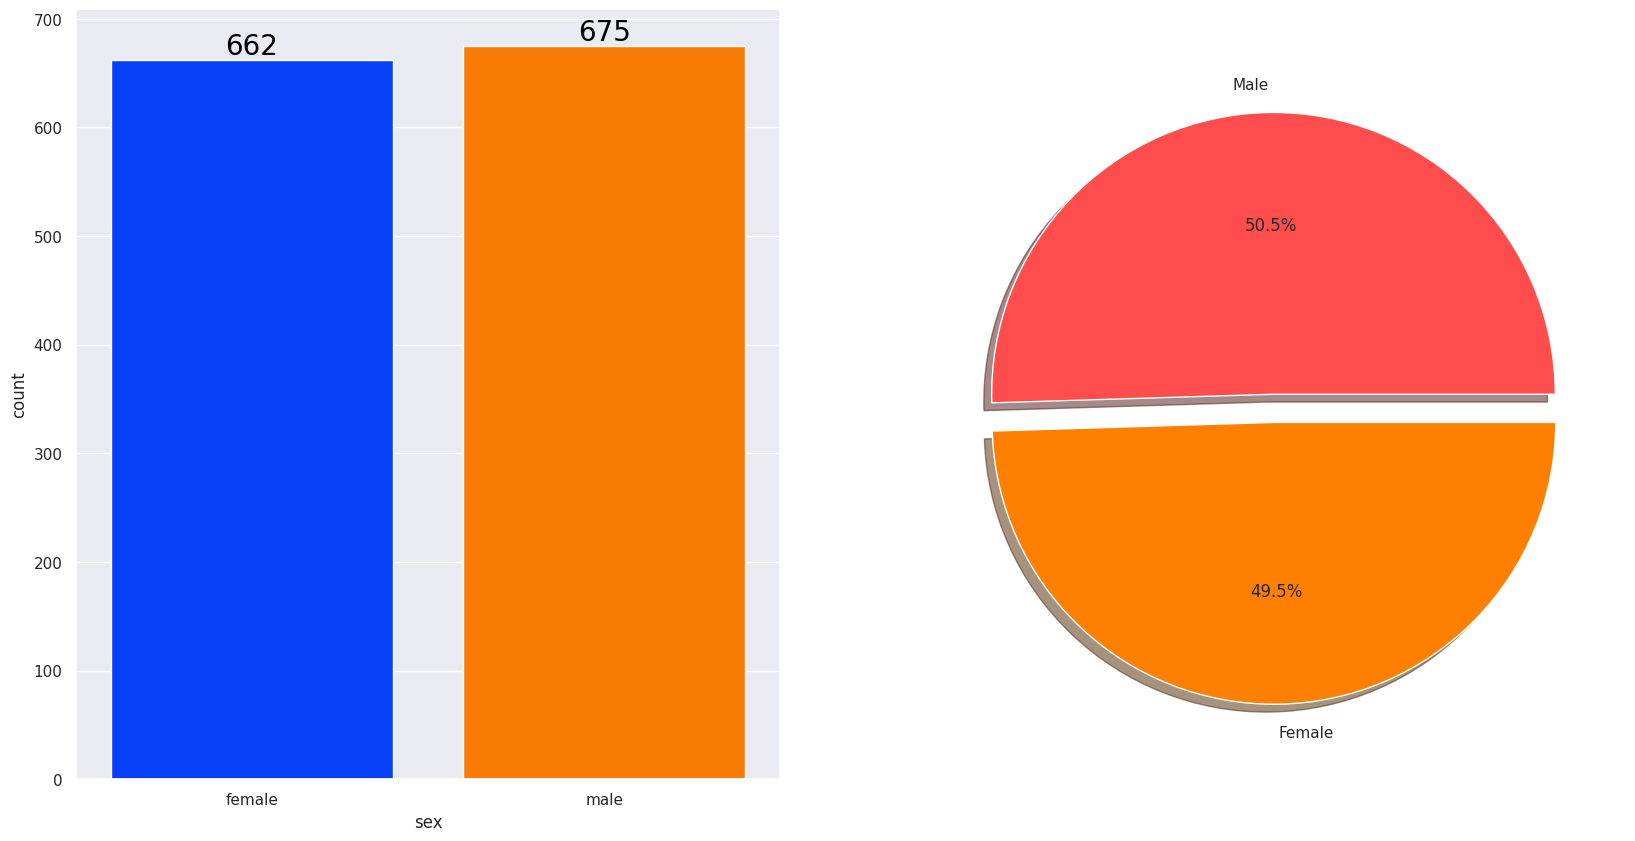

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insight 

- Gender has balanced data 50.5% male and 49.5% female

#### 4.4.2 Smocker Coloum
- Male and Female smocker on charges

<Axes: xlabel='smoker', ylabel='charges'>

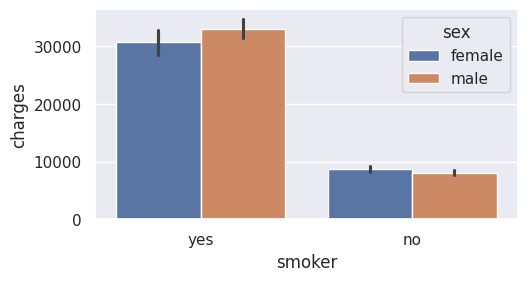

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['smoker'], y=df['charges'], hue=df['sex'])


In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 4.4.3 CHECKING OUTLIERS

<Axes: ylabel='charges'>

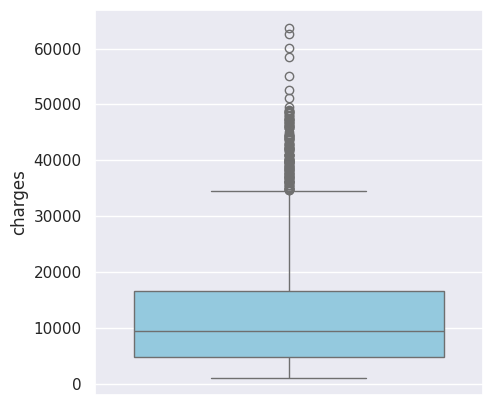

In [35]:
plt.subplots(figsize=(5,5))

sns.boxplot(df['charges'],color='skyblue')


#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

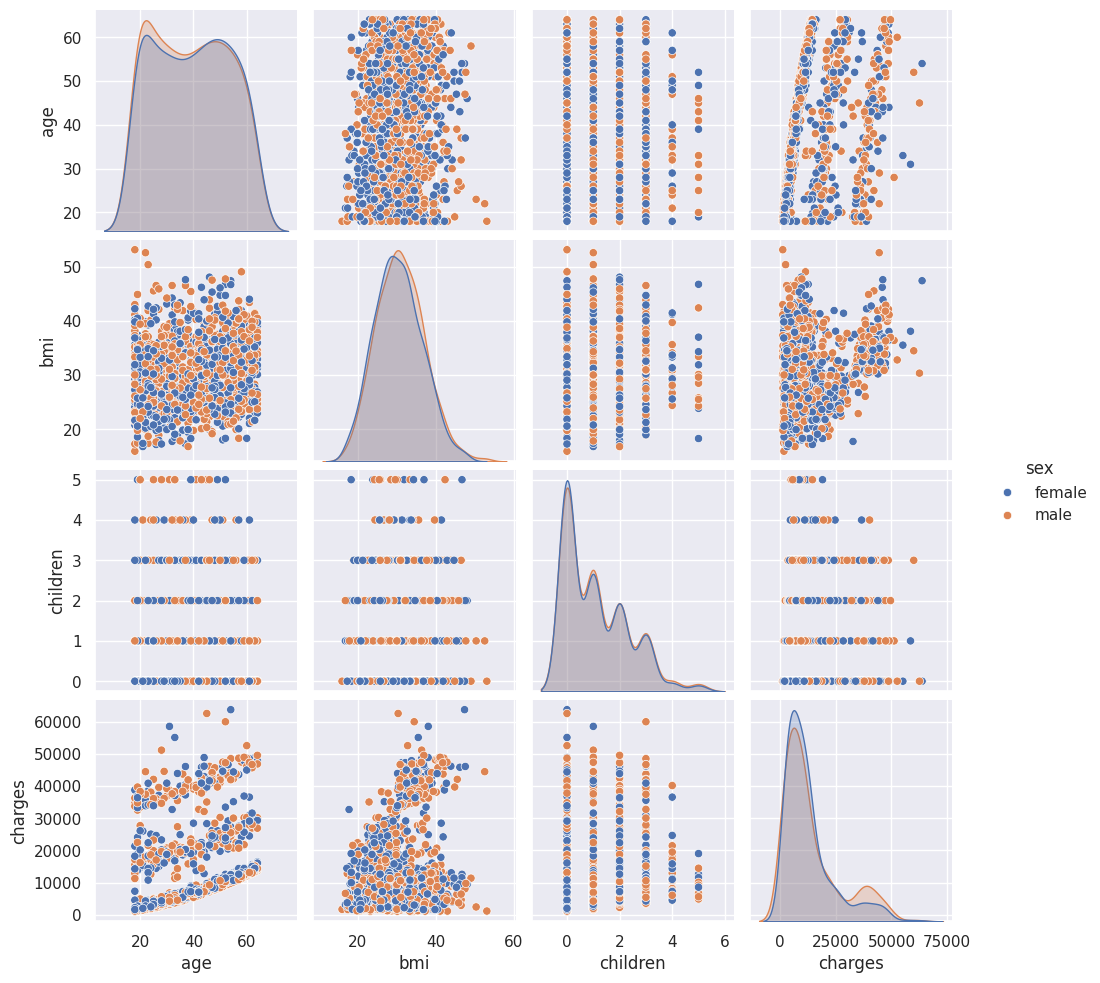

In [36]:
sns.pairplot(df,hue = 'sex')
plt.show()